In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

Возьмите датасет с цветками iris’а

In [126]:
from sklearn.datasets import load_iris
iris = load_iris()

Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [127]:
# загружаем данные в датафрейм
data_iris1 = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_variety = iris.target
data_iris = data_iris1[['sepal length (cm)', 'sepal width (cm)']]

In [136]:
data_iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [21]:
iris_variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Разделите данные на выборку для обучения и тестирования

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_iris, iris_variety, test_size=0.25)

Постройте модель LDA

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [90]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [91]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0])

In [92]:
# точность модели:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test)) 

0.868421052631579

In [93]:
lda.coef_

array([[-6.4057843 ,  8.74928411],
       [ 1.08502739, -3.361868  ],
       [ 3.5422008 , -3.04770961]])

Визуализируйте предсказания для тестовой выборки и центры классов

In [97]:
lda.means_

array([[5.03      , 3.41      ],
       [5.9325    , 2.7675    ],
       [6.54285714, 2.97857143]])

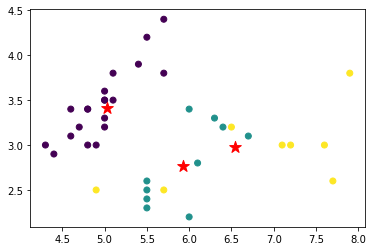

In [133]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c = 'r', s = 150, marker =   '*')
plt.show()

In [ ]:
# видим, что одна группа четко отделена. разделение двух остальных не столь однозначно

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width.
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [106]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [108]:
# fit-transform сразу обучается и преобразует данные
iris_scaled = scaler.fit_transform(data_iris)

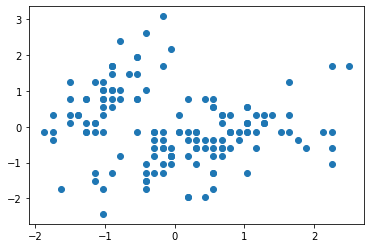

In [110]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1])

In [112]:
# на основе графика будем разделять данные на два кластера

In [113]:
from sklearn.cluster import KMeans

In [118]:
kmeans = KMeans(n_clusters = 2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(iris_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

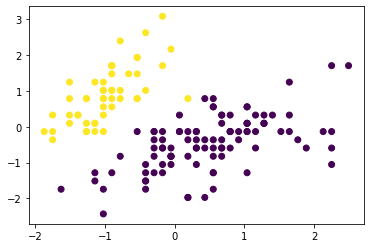

In [119]:
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1], c = clusters)